In [27]:
import chess
import chess.engine
import os
import io
import chess.pgn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [28]:
from stockfish import Stockfish

stockfish = Stockfish(path=r"C:\Users\diman\Downloads\stockfish-windows-x86-64-avx2\stockfish\stockfish-windows-x86-64-avx2.exe")


In [29]:
stockfish.set_depth(8)

In [30]:
pgn1 = 'd4 d5 Nc3 Nf6 Bf4 g6 f3 Bg7 Qd3 Bf5 e4 dxe4 fxe4 Bc8 h3 O-O g4 Nc6 O-O-O e6 e5 Nd5 Nxd5 Qxd5 Qf3 Qa5 a3 Rb8 h4 Qb6 d5 exd5 Qxd5 Bxg4 Be2 Be6 Qd2 Rbd8 Qe1 Rxd1+ Qxd1 Nd4 Bd3 Qc5 h5 Qd5 Ne2 Nxe2+ Bxe2 Qa2 Kd2 Qxb2 hxg6 fxg6 Bg3 Rd8+ Bd3 Bc4 Ke1 Bxd3 cxd3 Bxe5 Bxe5 Qxe5+ Kd2 Qb2+ Ke3 Qxa3 Qc2 Re8+ Kf4 Qd6+ Kg5 Qe5+ Kh6 Qf4# 0-1'


In [31]:
pgn_io = io.StringIO("[Event \"?\"]\n[Site \"?\"]\n[Date \"????.??.??\"]\n[Round \"?\"]\n[White \"?\"]\n[Black \"?\"]\n\n" + pgn1)
#pgn_io = data_blitz.iloc[221]["pgn"]

game = chess.pgn.read_game(pgn_io)

board = game.board()

eval_array1 = []

move_number = 1
for move in game.mainline_moves():
    board.push(move) 
    stockfish.set_fen_position(board.fen())
    
    eval_info = stockfish.get_evaluation()
    
    if eval_info["type"] == "cp":
        eval_score = eval_info["value"] / 100  # converts centipawns eval measurement to pawns for readability
    elif eval_info["type"] == "mate":
        eval_score = f"mate in {eval_info['value']}"
    else:
        eval_score = None
    
    eval_array1.append(eval_score)
    move_number += 1

print(eval_array1)

[0.13, 0.25, 0.01, -0.05, -0.08, 0.19, -0.5, -0.25, -1.41, 0.93, 0.77, 1.16, 0.52, 0.96, -0.15, 0.99, 0.4, 1.13, 0.81, 2.19, 0.16, -0.25, -0.63, -0.48, -1.12, 1.07, 0.5, 1.09, 0.43, 2.87, -3.05, 0.33, -3.37, -3.85, -4.46, -3.74, -4.47, -3.34, -4.64, -3.38, -5.17, -2.81, -3.56, -3.23, -3.54, -3.0, -3.12, -2.84, -3.13, -3.48, -3.82, -3.99, -6.4, -4.98, -5.31, -5.18, -5.11, -5.13, -5.16, -4.53, -5.44, -5.4, -5.35, -5.06, -5.95, -5.86, -5.99, -5.01, -4.99, -5.05, -6.29, -5.52, 'mate in -2', -5.18, 'mate in -1', 'mate in 0']


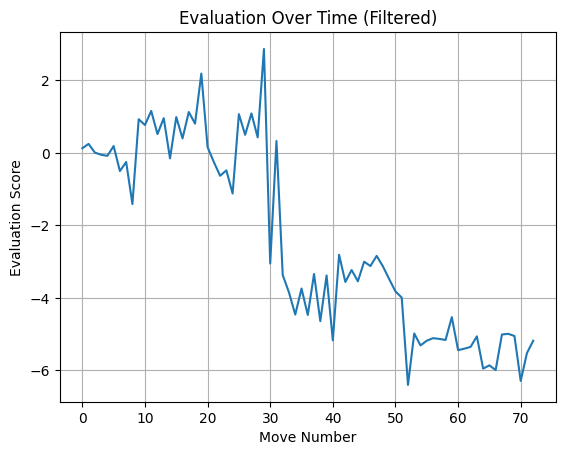

In [32]:
numeric_data = []
for item in eval_array1:
    if isinstance(item, (int, float)):
        numeric_data.append(item)

plt.plot(numeric_data)
plt.title('Evaluation Over Time (Filtered)')
plt.xlabel('Move Number')
plt.ylabel('Evaluation Score')
plt.grid(True)
plt.show()

In [33]:
import statistics
var = statistics.variance(numeric_data)
print("Variance:", var)

Variance: 6.846361719939117


In [34]:
blunders_white = 0
mistakes_white = 0
normal_white = 0

blunders_black = 0
mistakes_black = 0
normal_black = 0

total_change_black = 0
total_change_white = 0

gradient = 0

i = 1
j=0
while i<len(eval_array1):
    if i % 2 ==0:
        if type(eval_array1[i])==str:
            eval_array1[i]=8
        if abs(eval_array1[i]-eval_array1[j]) >=1.5:
            blunders_white += 1
        elif 0.5 < abs(eval_array1[i]-eval_array1[j]) <1.5:
            mistakes_white +=1
        else:
            normal_white += 1
    else:
        if type(eval_array1[i])==str:
            eval_array1[i]=-8
        if abs(eval_array1[i]-eval_array1[j]) >=1.5:
            blunders_black += 1
        elif 0.5 < abs(eval_array1[i]-eval_array1[j]) <1.5:
            mistakes_black +=1
        else:
            normal_black += 1 

    j+=1
    i +=1

In [35]:
print(eval_array1)

[0.13, 0.25, 0.01, -0.05, -0.08, 0.19, -0.5, -0.25, -1.41, 0.93, 0.77, 1.16, 0.52, 0.96, -0.15, 0.99, 0.4, 1.13, 0.81, 2.19, 0.16, -0.25, -0.63, -0.48, -1.12, 1.07, 0.5, 1.09, 0.43, 2.87, -3.05, 0.33, -3.37, -3.85, -4.46, -3.74, -4.47, -3.34, -4.64, -3.38, -5.17, -2.81, -3.56, -3.23, -3.54, -3.0, -3.12, -2.84, -3.13, -3.48, -3.82, -3.99, -6.4, -4.98, -5.31, -5.18, -5.11, -5.13, -5.16, -4.53, -5.44, -5.4, -5.35, -5.06, -5.95, -5.86, -5.99, -5.01, -4.99, -5.05, -6.29, -5.52, 8, -5.18, 8, -8]


In [36]:
print(blunders_white)

7


In [37]:
x = np.arange(len(eval_array1)).reshape(-1, 1)
y = np.array(eval_array1).reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
gradient = model.coef_[0][0]
b = model.intercept_[0]

In [38]:
print(gradient)

-0.08081544771018455


In [39]:
processed_data_blitz = pd.read_csv(r"C:\Users\diman\Downloads\Chess_Elo_Guesser\Processed.csv")

In [40]:
processed_data_blitz.head

<bound method NDFrame.head of        white_rating  black_rating white_result black_result time_control  \
0              1547          1399      timeout          win          300   
1              1514          1536          win     resigned          300   
2              1544          1452          win   checkmated          300   
3               857           821          win      timeout          300   
4               829           817          win   checkmated          300   
...             ...           ...          ...          ...          ...   
28800           866           901     resigned          win          300   
28801           910           912          win      timeout          300   
28802           909           919    abandoned          win          300   
28803           928           933          win     resigned          300   
28804           927           919          win     resigned          300   

       rated                                             

In [41]:
processed_data_blitz.drop(columns=["pgn"])

,white_rating,black_rating,white_result,black_result,time_control,rated,Moves,Time_Difference
0,1547,1399,timeout,win,300,True,e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0
1,1514,1536,win,resigned,300,True,e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0
2,1544,1452,win,checkmated,300,True,e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0
3,857,821,win,timeout,300,True,e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0
4,829,817,win,checkmated,300,True,e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0
...,...,...,...,...,...,...,...,...
28800,866,901,resigned,win,300,True,e4 e6 d4 d5 e5 f5 Nf3 Nc6 c3 Bd7 Qb3 b6 a4 Qe7...,143.0
28801,910,912,win,timeout,300,True,e4 e5 c4 Nc6 d3 Nf6 g3 d6 Nh3 Bg4 Be2 Bxe2 Qxe...,562.0
28802,909,919,abandoned,win,300,True,e4 e5 Nf3 d6 Bc4 c5 Ng5 Qxg5 O-O Bh3 Qf3 Bg4 Q...,407.0
28803,928,933,win,resigned,300,True,e4 c5 d3 Nc6 c4 e5 Nc3 Nf6 g3 d6 Nh3 Be6 Bg2 h...,84.0


In [42]:
def get_eval(pgn):
    pgn_io = io.StringIO("[Event \"?\"]\n[Site \"?\"]\n[Date \"????.??.??\"]\n[Round \"?\"]\n[White \"?\"]\n[Black \"?\"]\n\n" + pgn)
    #pgn_io = data_blitz.iloc[221]["pgn"]

    game = chess.pgn.read_game(pgn_io)


    board = game.board()

    # Store move number and eval
    eval_array = []

    move_number = 1
    for move in game.mainline_moves():
        board.push(move) 
        stockfish.set_fen_position(board.fen())
        
        eval_info = stockfish.get_evaluation()
        

        if eval_info["type"] == "cp":
            eval_score = eval_info["value"] / 100  
        elif eval_info["type"] == "mate":

            eval_score = f"mate in {eval_info['value']}"
        else:
            eval_score = None
        
        eval_array.append(eval_score)
        move_number += 1

    return eval_array

In [43]:
def get_data(eval_array):
    blunders_white = 0
    mistakes_white = 0
    normal_white = 0

    blunders_black = 0
    mistakes_black = 0
    normal_black = 0

    total_change_black = 0
    total_change_white = 0

    gradient = 0

    total = 0
    i = 1
    j=0
    while i<len(eval_array):

        if i % 2 ==0:
            if type(eval_array[i])==str:
                eval_array[i]=8
            if abs(eval_array[i]-eval_array[j]) >=1.5:
                blunders_white += 1
            elif 0.5 < abs(eval_array[i]-eval_array[j]) <1.5:
                mistakes_white +=1
            else:
                normal_white += 1
            total_change_white += eval_array[i]-eval_array[j]
            total+=eval_array[i]
        else:
            if type(eval_array[i])==str:
                eval_array[i]=-8
            if abs(eval_array[i]-eval_array[j]) >=1.5:
                blunders_black += 1
            elif 0.5 < abs(eval_array[i]-eval_array[j]) <1.5:
                mistakes_black +=1
            else:
                normal_black += 1
            total_change_black += eval_array[i]-eval_array[j]
            total+=eval_array[i]
        j+=1
        i +=1
    x = np.arange(len(eval_array)).reshape(-1, 1)
    y = np.array(eval_array).reshape(-1, 1)


    if len(eval_array)>1:
        variance = statistics.variance(eval_array)

        model = LinearRegression()
        model.fit(x, y)
        gradient = model.coef_[0][0]
        b = model.intercept_[0]

    else:
        variance = 0
        gradient =0
    if i !=0:
        average_eval = total/i
        average_eval_change_black = total_change_black/i
        average_eval_change_white = total_change_white/i
    else:
        average_eval = 0
        average_eval_change_black = 0
        average_eval_change_white = 0
        
    game_length = i

    return {
        "blunders_white": blunders_white,
        "mistakes_white": mistakes_white,
        "normal_white": normal_white,
        "blunders_black": blunders_black,
        "mistakes_black": mistakes_black,
        "normal_black": normal_black,
        "gradient": gradient,
        "variance": variance,
        "average_eval": average_eval,
        "average_eval_change_black": average_eval_change_black,
        "average_eval_change_white": average_eval_change_white,
        "game_length": game_length

    }

In [44]:
data_after_collection = processed_data_blitz[['blunders_white', 'mistakes_white', 'normal_white', 'blunders_black', 'mistakes_black', 'normal_black', 'gradient',"variance", "average_eval", "average_eval_change_black", "average_eval_change_white", "game_length"]] = None

In [45]:
row = 0
while row<5:
    pgn = processed_data_blitz.iloc[row]["Moves"]
    eval_array = get_eval(pgn)
    stats = get_data(eval_array)
    processed_data_blitz.at[row, "blunders_white"] = stats["blunders_white"]
    processed_data_blitz.at[row, "mistakes_white"] = stats["mistakes_white"]
    processed_data_blitz.at[row, "normal_white"] = stats["normal_white"]
    processed_data_blitz.at[row, "blunders_black"] = stats["blunders_black"]
    processed_data_blitz.at[row, "mistakes_black"] = stats["mistakes_black"]
    processed_data_blitz.at[row, "normal_black"] = stats["normal_black"]
    processed_data_blitz.at[row, "gradient"] = stats["gradient"]
    processed_data_blitz.at[row, "variance"] = stats["variance"]
    processed_data_blitz.at[row, "average_eval"] = stats["average_eval"]
    processed_data_blitz.at[row, "average_eval_change_black"] = stats["average_eval_change_black"]
    processed_data_blitz.at[row, "average_eval_change_white"] = stats["average_eval_change_white"]
    processed_data_blitz.at[row, "game_length"] = stats["game_length"]
    
    row +=1

In [46]:
processed_data_blitz.head

<bound method NDFrame.head of        white_rating  black_rating white_result black_result time_control  \
0              1547          1399      timeout          win          300   
1              1514          1536          win     resigned          300   
2              1544          1452          win   checkmated          300   
3               857           821          win      timeout          300   
4               829           817          win   checkmated          300   
...             ...           ...          ...          ...          ...   
28800           866           901     resigned          win          300   
28801           910           912          win      timeout          300   
28802           909           919    abandoned          win          300   
28803           928           933          win     resigned          300   
28804           927           919          win     resigned          300   

       rated                                             

In [47]:
processed_data_blitz = pd.DataFrame(processed_data_blitz)

In [48]:
processed_data_blitz.head(20)

,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,...,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,...,15,2,11,17,-0.073309,5.932201,-0.015167,0.297,-0.352667,60
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,...,2,0,1,4,-0.571697,4.983223,-1.146,0.159,-0.69,10
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,...,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,...,15,20,16,18,0.00779,7.536467,3.99633,0.76945,-0.721101,109
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,...,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69
5,809,837,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 g4 d5 Bg2 d4 Nf3 Nf6 d3 Nc6 Bg5 Bxg4 h3 ...,573.0,None,...,None,None,None,None,None,None,None,None,None,None
6,829,846,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 Qf6 Nf3 Bc5 d3 Qb6 O-O Qg6 Ng5 d5 Bx...,583.0,None,...,None,None,None,None,None,None,None,None,None,None
7,820,814,resigned,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 Nc6 Qf3 f6 Qf5 Nd4 Qh5+ g6 Qh3 Nxc2+...,270.0,None,...,None,None,None,None,None,None,None,None,None,None
8,851,829,checkmated,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",b3 d5 Bb2 d4 d3 Nc6 h3 e6 g4 Bd6 Bg2 Ne5 e4 dx...,581.0,None,...,None,None,None,None,None,None,None,None,None,None
9,837,821,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 exd5 Qxd5 Nf3 Nc6 Nc3 Qf5 Be2 a6 O-O Be6...,438.0,None,...,None,None,None,None,None,None,None,None,None,None


In [49]:
row = 0
while row<20:
    pgn = processed_data_blitz.iloc[row]["Moves"]
    eval_array = get_eval(pgn)
    stats = get_data(eval_array)
    processed_data_blitz.at[row, "blunders_white"] = stats["blunders_white"]
    processed_data_blitz.at[row, "mistakes_white"] = stats["mistakes_white"]
    processed_data_blitz.at[row, "normal_white"] = stats["normal_white"]
    processed_data_blitz.at[row, "blunders_black"] = stats["blunders_black"]
    processed_data_blitz.at[row, "mistakes_black"] = stats["mistakes_black"]
    processed_data_blitz.at[row, "normal_black"] = stats["normal_black"]
    processed_data_blitz.at[row, "gradient"] = stats["gradient"]
    processed_data_blitz.at[row, "variance"] = stats["variance"]
    processed_data_blitz.at[row, "average_eval"] = stats["average_eval"]
    processed_data_blitz.at[row, "average_eval_change_black"] = stats["average_eval_change_black"]
    processed_data_blitz.at[row, "average_eval_change_white"] = stats["average_eval_change_white"]
    processed_data_blitz.at[row, "game_length"] = stats["game_length"]
    
    row +=1

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import chess.pgn
from io import StringIO
import chess.polyglot
import io


In [51]:
data = processed_data_blitz

In [52]:
data.head(20)

,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,...,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,...,15,2,11,17,-0.073309,5.932201,-0.015167,0.297,-0.352667,60
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,...,2,0,1,4,-0.571697,4.983223,-1.146,0.159,-0.69,10
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,...,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,...,15,20,16,18,0.00779,7.536467,3.99633,0.76945,-0.721101,109
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,...,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69
5,809,837,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 g4 d5 Bg2 d4 Nf3 Nf6 d3 Nc6 Bg5 Bxg4 h3 ...,573.0,14,...,25,13,13,23,0.104154,27.175917,3.087653,-0.869796,0.932041,98
6,829,846,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 Qf6 Nf3 Bc5 d3 Qb6 O-O Qg6 Ng5 d5 Bx...,583.0,6,...,11,12,6,8,-0.027222,13.253267,3.043269,-0.108846,0.011731,52
7,820,814,resigned,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 Nc6 Qf3 f6 Qf5 Nd4 Qh5+ g6 Qh3 Nxc2+...,270.0,8,...,11,3,13,14,-0.180989,13.426221,-7.552167,0.321333,-0.482333,60
8,851,829,checkmated,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",b3 d5 Bb2 d4 d3 Nc6 h3 e6 g4 Bd6 Bg2 Ne5 e4 dx...,581.0,11,...,21,7,25,22,-0.109889,20.871401,-2.819074,0.189444,-0.263333,108
9,837,821,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 exd5 Qxd5 Nf3 Nc6 Nc3 Qf5 Be2 a6 O-O Be6...,438.0,8,...,22,10,9,21,0.061972,8.036485,2.938765,0.230617,-0.15037,81


In [53]:
booka = pd.read_csv(r"C:\Users\diman\Downloads\a.tsv", sep='\t')
bookb = pd.read_csv(r"C:\Users\diman\Downloads\b.tsv", sep='\t')
bookc = pd.read_csv(r"C:\Users\diman\Downloads\c.tsv", sep='\t')
bookd = pd.read_csv(r"C:\Users\diman\Downloads\d.tsv", sep='\t')
booke = pd.read_csv(r"C:\Users\diman\Downloads\e.tsv", sep='\t')

combined_book = pd.concat([booka, bookb, bookc, bookd, booke])
book_moves = list(zip(combined_book['pgn'], combined_book['name']))

book_moves = [(pgn.strip(), name) for pgn, name in book_moves] # Removes trailing/leading whitespace


def get_opening(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn: 
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node

    game_san_string = ' '.join(san_moves)
    iteration = 0
    for book_pgn, name in sorted(book_moves, key=lambda x: -len(x[0])):
        if game_san_string.startswith(book_pgn):
            full_moves = book_pgn.count('.')
            if name.endswith('Gambit'):
                return {"name": name, "move_number": full_moves, "type": "Gambit"}
            else:
                return {"name": name, "move_number": full_moves, "type": "Normal"}


    return {"name": "Unknown Opening", "move_number": "unknown", "type": "unknown"}

In [54]:
pgn = data.loc[109, "pgn"]
print(get_opening(pgn))

{'name': 'Sicilian Defense: Modern Variations, Tartakower', 'move_number': 4, 'type': 'Normal'}


In [55]:
def castle_moves(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node

    game_san_string = ' '.join(san_moves)
    i = 0
    n =0
    black_type = None
    white_type = None
    while i < len(san_moves):
        if san_moves[i] == "O-O" or san_moves[i] == "O-O+":
            n=1
            i = (i+1)//2
            black_type= 'K' 
            break
        elif  san_moves[i]== "O-O-O" or san_moves[i]=="O-O-O+":
            n=1
            i = (i+1)//2
            black_type= 'Q' 
            break   
        i+=1
    if n==0:
        i = 'None'
    k =0
    j = 0
    for index, move in enumerate(san_moves):
        if move.endswith('O-O') or move.endswith('O-O+'):
            if index %2 ==0:
                try:
                    j= int(move.split('.')[0])
                    k =1 
                except:
                    j = 'None'
                    k=1
            white_type= 'K' 
        elif move.endswith('O-O-O') or move.endswith('O-O-O+'):
            if index %2 ==0:
                try:
                    j= int(move.split('.')[0])
                    k =1 
                except:
                    j = 'None'
                    k=1
            white_type= 'Q'            

    if k==0:
        j = 'None'
    if black_type==white_type:
        t = 0
    else:
        t=1
    return {'black':i,'white':j,'Difference':t}

In [56]:
pgn = data.loc[123, "pgn"]
print(pgn)
print(castle_moves(pgn))

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2021.05.17"]
[Round "-"]
[White "00Arch_Bishop00"]
[Black "yocariche"]
[Result "1-0"]
[CurrentPosition "r2q1r1k/pp4p1/n7/2b1Q2p/2B3N1/P2P1N2/1PPB1P2/2KR2R1 b - -"]
[Timezone "UTC"]
[ECO "C41"]
[ECOUrl "https://www.chess.com/openings/Philidor-Defense-3.Bc4-Be7"]
[UTCDate "2021.05.17"]
[UTCTime "21:01:52"]
[WhiteElo "1244"]
[BlackElo "1320"]
[TimeControl "180+2"]
[Termination "00Arch_Bishop00 won by resignation"]
[StartTime "21:01:52"]
[EndDate "2021.05.17"]
[EndTime "21:05:19"]
[Link "https://www.chess.com/game/live/15024415985"]

1. e4 {[%clk 0:03:02]} 1... e5 {[%clk 0:03:01.9]} 2. Nf3 {[%clk 0:03:03.4]} 2... d6 {[%clk 0:03:03.8]} 3. Bc4 {[%clk 0:03:04.4]} 3... Be7 {[%clk 0:03:04.6]} 4. Nc3 {[%clk 0:03:05.9]} 4... Nf6 {[%clk 0:03:05.6]} 5. d3 {[%clk 0:03:07.4]} 5... O-O {[%clk 0:03:07]} 6. Be3 {[%clk 0:03:08]} 6... Nc6 {[%clk 0:03:08.4]} 7. Qe2 {[%clk 0:03:09]} 7... Bg4 {[%clk 0:03:07.9]} 8. h3 {[%clk 0:03:09.2]} 8... Bh5 {[%clk 0:03:08.7]

In [57]:
'''

def Piece_moves(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:  # white to move
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    letters = ["B", "N", "R", "Q", "K"]

    counts = []

    for letter in letters:
        count_black =0
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if letter in move:
                    count_white+=1
            else:
                if letter in move:
                    count_black +=1
        counts.append([count_white, count_black])
    print(counts)
    return counts
'''

'\n\ndef Piece_moves(pgn_text):\n    pgn = StringIO(pgn_text)\n    game = chess.pgn.read_game(pgn)\n\n    if game is None:\n        return "Invalid PGN"\n\n    node = game\n    san_moves = []\n    move_number = 1\n    while node.variations:\n        next_node = node.variations[0]\n        move = node.board().san(next_node.move)\n        if node.board().turn:  # white to move\n            san_moves.append(f"{move_number}. {move}")\n        else:\n            san_moves.append(f"{move}")\n            move_number += 1\n        node = next_node\n    letters = ["B", "N", "R", "Q", "K"]\n\n    counts = []\n\n    for letter in letters:\n        count_black =0\n        count_white =0\n        for index, move in enumerate(san_moves):\n            if index %2 ==0:\n                if letter in move:\n                    count_white+=1\n            else:\n                if letter in move:\n                    count_black +=1\n        counts.append([count_white, count_black])\n    print(counts)\n 

In [58]:
pgn = data.loc[21, "pgn"]
#print(Piece_moves(pgn))
#print(Piece_moves_total(pgn))

In [59]:
'''

def Piece_moves_10(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:  # white to move
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    letters = ["B", "N", "R", "Q", "K"]

    counts = []
    san_moves = san_moves[:20]
    for letter in letters:
        count_black =0
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if letter in move:
                    count_white+=1
            else:
                if letter in move:
                    count_black +=1
        counts.append([count_white, count_black])
    print(counts)
    return counts
'''

'\n\ndef Piece_moves_10(pgn_text):\n    pgn = StringIO(pgn_text)\n    game = chess.pgn.read_game(pgn)\n\n    if game is None:\n        return "Invalid PGN"\n\n    node = game\n    san_moves = []\n    move_number = 1\n    while node.variations:\n        next_node = node.variations[0]\n        move = node.board().san(next_node.move)\n        if node.board().turn:  # white to move\n            san_moves.append(f"{move_number}. {move}")\n        else:\n            san_moves.append(f"{move}")\n            move_number += 1\n        node = next_node\n    letters = ["B", "N", "R", "Q", "K"]\n\n    counts = []\n    san_moves = san_moves[:20]\n    for letter in letters:\n        count_black =0\n        count_white =0\n        for index, move in enumerate(san_moves):\n            if index %2 ==0:\n                if letter in move:\n                    count_white+=1\n            else:\n                if letter in move:\n                    count_black +=1\n        counts.append([count_white, co

In [60]:
def Piece_moves_individual_10(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {
            "white_B": 0, "white_N": 0, "white_R": 0, "white_Q": 0, "white_K": 0, "white_+": 0,
            "black_B": 0, "black_N": 0, "black_R": 0, "black_Q": 0, "black_K": 0, "black_+": 0,
        }

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    san_moves = san_moves[:40]
    letters = ["B", "N", "R", "Q", "K", "+"]
    variables_white = {f"white_{l}": 0 for l in letters}
    variables_black = {f"black_{l}": 0 for l in letters}

    for index, move in enumerate(san_moves):
        for letter in letters:
            if index % 2 == 0:
                if letter in move:
                    variables_white[f"white_{letter}"] += 1
            else:
                if letter in move:
                    variables_black[f"black_{letter}"] += 1

    return {**variables_white, **variables_black}


In [61]:
pgn = data.loc[18, "pgn"]
#print(Piece_moves_10(pgn))
print(Piece_moves_individual_10(pgn))

{'white_B': 1, 'white_N': 3, 'white_R': 2, 'white_Q': 3, 'white_K': 4, 'white_+': 1, 'black_B': 4, 'black_N': 2, 'black_R': 2, 'black_Q': 5, 'black_K': 0, 'black_+': 3}


In [62]:
def Piece_moves_total(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {
            "white_B": 0, "white_N": 0, "white_R": 0, "white_Q": 0, "white_K": 0, "white_+": 0,
            "black_B": 0, "black_N": 0, "black_R": 0, "black_Q": 0, "black_K": 0, "black_+": 0,
        }

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    letters = ["B", "N", "R", "Q", "K", "+"]
    variables_white = {f"white_{l}": 0 for l in letters}
    variables_black = {f"black_{l}": 0 for l in letters}

    for index, move in enumerate(san_moves):
        for letter in letters:
            if index % 2 == 0:
                if letter in move:
                    variables_white[f"white_{letter}"] += 1
            else:
                if letter in move:
                    variables_black[f"black_{letter}"] += 1

    return {**variables_white, **variables_black}


In [63]:
pgn = data.loc[199, "pgn"]
print(Piece_moves_total(pgn))
print(Piece_moves_individual_10(pgn))

{'white_B': 4, 'white_N': 11, 'white_R': 7, 'white_Q': 4, 'white_K': 1, 'white_+': 0, 'black_B': 9, 'black_N': 5, 'black_R': 6, 'black_Q': 1, 'black_K': 0, 'black_+': 1}
{'white_B': 1, 'white_N': 8, 'white_R': 0, 'white_Q': 4, 'white_K': 0, 'white_+': 0, 'black_B': 3, 'black_N': 5, 'black_R': 2, 'black_Q': 1, 'black_K': 0, 'black_+': 0}


In [64]:
pgn = data.loc[4, "pgn"]
print(pgn)
print(Piece_moves_total(pgn))

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2021.05.01"]
[Round "-"]
[White "-TexasT-"]
[Black "zardara"]
[Result "1-0"]
[CurrentPosition "3r1k2/p4Q2/5p2/2p1pP2/1P2K3/P2P1P2/BBn3r1/7R b - -"]
[Timezone "UTC"]
[ECO "C23"]
[ECOUrl "https://www.chess.com/openings/Bishops-Opening"]
[UTCDate "2021.05.01"]
[UTCTime "19:27:59"]
[WhiteElo "829"]
[BlackElo "817"]
[TimeControl "300"]
[Termination "-TexasT- won by checkmate"]
[StartTime "19:27:59"]
[EndDate "2021.05.01"]
[EndTime "19:36:09"]
[Link "https://www.chess.com/game/live/13636322559"]

1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:59.9]} 2. Bc4 {[%clk 0:04:55.2]} 2... f6 {[%clk 0:04:52.6]} 3. a3 {[%clk 0:04:43.4]} 3... Nc6 {[%clk 0:04:48.9]} 4. Nf3 {[%clk 0:04:39.1]} 4... g5 {[%clk 0:04:41.9]} 5. c3 {[%clk 0:04:30.5]} 5... d6 {[%clk 0:04:40.6]} 6. Ba2 {[%clk 0:04:28.8]} 6... Nh6 {[%clk 0:04:32]} 7. d3 {[%clk 0:04:14.6]} 7... g4 {[%clk 0:04:28]} 8. Nh4 {[%clk 0:03:55.2]} 8... Bg7 {[%clk 0:04:19.2]} 9. h3 {[%clk 0:03:37.6]} 9... Bd7 {[%clk

In [65]:
def aggro_pawn_white(pgn_text):

    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}


    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    pushes = ["a4", "b4", "g4", "h4"]
    san_moves = san_moves[:20]
    counts=[]
    for push in pushes:
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if push in move:
                    count_white+=1
            else:
                pass
        counts.append(count_white)
    total = sum(counts)
    return {
        "a4": counts[0],
        "b4": counts[1],
        "g4": counts[2],
        "h4": counts[3],
        "total_pushes": total
    }

In [66]:
pgn = data.loc[4, "pgn"]
print(pgn)
print(aggro_pawn_white(pgn))

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2021.05.01"]
[Round "-"]
[White "-TexasT-"]
[Black "zardara"]
[Result "1-0"]
[CurrentPosition "3r1k2/p4Q2/5p2/2p1pP2/1P2K3/P2P1P2/BBn3r1/7R b - -"]
[Timezone "UTC"]
[ECO "C23"]
[ECOUrl "https://www.chess.com/openings/Bishops-Opening"]
[UTCDate "2021.05.01"]
[UTCTime "19:27:59"]
[WhiteElo "829"]
[BlackElo "817"]
[TimeControl "300"]
[Termination "-TexasT- won by checkmate"]
[StartTime "19:27:59"]
[EndDate "2021.05.01"]
[EndTime "19:36:09"]
[Link "https://www.chess.com/game/live/13636322559"]

1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:59.9]} 2. Bc4 {[%clk 0:04:55.2]} 2... f6 {[%clk 0:04:52.6]} 3. a3 {[%clk 0:04:43.4]} 3... Nc6 {[%clk 0:04:48.9]} 4. Nf3 {[%clk 0:04:39.1]} 4... g5 {[%clk 0:04:41.9]} 5. c3 {[%clk 0:04:30.5]} 5... d6 {[%clk 0:04:40.6]} 6. Ba2 {[%clk 0:04:28.8]} 6... Nh6 {[%clk 0:04:32]} 7. d3 {[%clk 0:04:14.6]} 7... g4 {[%clk 0:04:28]} 8. Nh4 {[%clk 0:03:55.2]} 8... Bg7 {[%clk 0:04:19.2]} 9. h3 {[%clk 0:03:37.6]} 9... Bd7 {[%clk

In [67]:
def aggro_pawn_black(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    pushes = ["a5", "b5", "g5", "h5"]
    san_moves = san_moves[:20]
    counts=[]
    for push in pushes:
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if push in move:
                    count_white+=1
            else:
                pass
        counts.append(count_white)
    total = sum(counts)
    return {
        "a5": counts[0],
        "b5": counts[1],
        "g5": counts[2],
        "h5": counts[3],
        "total_pushes": total
    }

In [68]:
pgn = data.loc[1, "pgn"]
print(pgn)
print(aggro_pawn_black(pgn))

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2020.09.25"]
[Round "-"]
[White "-mjtara-"]
[Black "welverchops"]
[Result "1-0"]
[CurrentPosition "rnbqkb1r/pp3ppp/2p1pn2/8/2P1p3/3B1N2/PP1P1PPP/RNBQK2R w KQkq -"]
[Timezone "UTC"]
[ECO "C00"]
[ECOUrl "https://www.chess.com/openings/French-Defense-Knight-Variation-2...d5"]
[UTCDate "2020.09.25"]
[UTCTime "14:41:06"]
[WhiteElo "1514"]
[BlackElo "1536"]
[TimeControl "300"]
[Termination "-mjtara- won by resignation"]
[StartTime "14:41:06"]
[EndDate "2020.09.25"]
[EndTime "14:41:53"]
[Link "https://www.chess.com/game/live/5495947514"]

1. e4 {[%clk 0:04:56.6]} 1... e6 {[%clk 0:04:58.1]} 2. Nf3 {[%clk 0:04:55.3]} 2... d5 {[%clk 0:04:57.4]} 3. Bb5+ {[%clk 0:04:47.4]} 3... c6 {[%clk 0:04:54.4]} 4. Bd3 {[%clk 0:04:44.7]} 4... Nf6 {[%clk 0:04:52.2]} 5. c4 {[%clk 0:04:36.1]} 5... dxe4 {[%clk 0:04:50.2]} 1-0

{'a5': 0, 'b5': 1, 'g5': 0, 'h5': 0, 'total_pushes': 1}


In [69]:

'''
def Bishop_pair(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    pushes = ["xB"]
    san_moves = san_moves[:20]
    counts=[]
    for push in pushes:
        count_black =0
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if push in move:
                    count_black+=1
            else:
                if push in move:
                    count_white+=1
        counts.append([count_black, count_white])
    print(counts)
    return counts
'''

'\ndef Bishop_pair(pgn_text):\n    pgn = StringIO(pgn_text)\n    game = chess.pgn.read_game(pgn)\n\n    if game is None:\n        return "Invalid PGN"\n\n    node = game\n    san_moves = []\n    move_number = 1\n    while node.variations:\n        next_node = node.variations[0]\n        move = node.board().san(next_node.move)\n        if node.board().turn:\n            san_moves.append(f"{move_number}. {move}")\n        else:\n            san_moves.append(f"{move}")\n            move_number += 1\n        node = next_node\n    pushes = ["xB"]\n    san_moves = san_moves[:20]\n    counts=[]\n    for push in pushes:\n        count_black =0\n        count_white =0\n        for index, move in enumerate(san_moves):\n            if index %2 ==0:\n                if push in move:\n                    count_black+=1\n            else:\n                if push in move:\n                    count_white+=1\n        counts.append([count_black, count_white])\n    print(counts)\n    return counts\n'

In [70]:
'''
def Knight_pair(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    pushes = ["xN"]
    san_moves = san_moves[:20]
    counts=[]
    for push in pushes:
        count_black =0
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if push in move:
                    count_black+=1
            else:
                if push in move:
                    count_white+=1
        counts.append([count_black, count_white])
    print(counts)
    return counts
    '''

'\ndef Knight_pair(pgn_text):\n    pgn = StringIO(pgn_text)\n    game = chess.pgn.read_game(pgn)\n\n    if game is None:\n        return "Invalid PGN"\n\n    node = game\n    san_moves = []\n    move_number = 1\n    while node.variations:\n        next_node = node.variations[0]\n        move = node.board().san(next_node.move)\n        if node.board().turn:\n            san_moves.append(f"{move_number}. {move}")\n        else:\n            san_moves.append(f"{move}")\n            move_number += 1\n        node = next_node\n    pushes = ["xN"]\n    san_moves = san_moves[:20]\n    counts=[]\n    for push in pushes:\n        count_black =0\n        count_white =0\n        for index, move in enumerate(san_moves):\n            if index %2 ==0:\n                if push in move:\n                    count_black+=1\n            else:\n                if push in move:\n                    count_white+=1\n        counts.append([count_black, count_white])\n    print(counts)\n    return counts\n   

In [71]:
def Number_takes(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    pushes = ["x"]
    counts=[]
    for push in pushes:
        count_black =0
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if push in move:
                    count_white+=1
            else:
                if push in move:
                    count_black+=1
        counts.append([count_black, count_white])
    return {'black':counts[0][0], 'white':counts[0][1]}

In [72]:
pgn = data.loc[9, "pgn"]

print(Number_takes(pgn))

{'black': 10, 'white': 14}


In [73]:
def Number_takes_20(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node
    pushes = ["x"]
    counts=[]
    san_moves = san_moves[:40]
    for push in pushes:
        count_black =0
        count_white =0
        for index, move in enumerate(san_moves):
            if index %2 ==0:
                if push in move:
                    count_white+=1
            else:
                if push in move:
                    count_black+=1
        counts.append([count_black, count_white])
    return {'black':counts[0][0], 'white':counts[0][1]}

In [74]:
pgn = data.loc[9, "pgn"]

print(Number_takes_20(pgn))

{'black': 7, 'white': 4}


In [75]:
def Number_first_piece_take(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {'move_number':"InvalidPGN"}

    board = game.board()
    node = game
    ply_count = 0  # Half moves

    while node.variations:
        next_node = node.variations[0]
        move = next_node.move

        if board.is_capture(move):
            captured_square = move.to_square
            captured_piece = board.piece_at(captured_square)

            if captured_piece and captured_piece.piece_type != chess.PAWN:  # Checks weather the captured piece is NOT a pawn

                move_number = (ply_count + 1) // 2
                return {'move_number':move_number}

        board.push(move)
        ply_count += 1
        node = next_node

    return {'move_number':"None"}

In [76]:
pgn = data.loc[2000, "pgn"]
print(pgn)
print(Number_first_piece_take(pgn))

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2021.05.14"]
[Round "-"]
[White "arashbidar"]
[Black "10edward10"]
[Result "0-1"]
[CurrentPosition "4rrk1/1pp2ppp/p7/3P4/8/1B1Rp3/P1P3PP/1K2q3 w - -"]
[Timezone "UTC"]
[ECO "D02"]
[ECOUrl "https://www.chess.com/openings/Queens-Pawn-Opening-Zukertort-Variation"]
[UTCDate "2021.05.14"]
[UTCTime "22:15:37"]
[WhiteElo "1042"]
[BlackElo "1078"]
[TimeControl "300"]
[Termination "10edward10 won by resignation"]
[StartTime "22:15:37"]
[EndDate "2021.05.14"]
[EndTime "22:18:10"]
[Link "https://www.chess.com/game/live/14769459473"]

1. d4 {[%clk 0:04:59.9]} 1... d5 {[%clk 0:04:55.2]} 2. Nf3 {[%clk 0:04:59.8]} 2... Bf5 {[%clk 0:04:46.8]} 3. Nc3 {[%clk 0:04:58.6]} 3... Nc6 {[%clk 0:04:38.9]} 4. Nh4 {[%clk 0:04:57.8]} 4... e6 {[%clk 0:04:33.5]} 5. Nxf5 {[%clk 0:04:56.8]} 5... exf5 {[%clk 0:04:31.9]} 6. Bf4 {[%clk 0:04:53.6]} 6... a6 {[%clk 0:04:23.8]} 7. Qd2 {[%clk 0:04:50.5]} 7... Bb4 {[%clk 0:04:20.6]} 8. O-O-O {[%clk 0:04:48.3]} 8... Nf6 {[%clk 0:04

In [77]:
def Number_second_piece_take(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    board = game.board()
    node = game
    ply_count = 0
    count = 0

    while node.variations:
        next_node = node.variations[0]
        move = next_node.move
        ply_count += 1

        if board.is_capture(move):
            captured_square = move.to_square
            captured_piece = board.piece_at(captured_square)

            if captured_piece and captured_piece.piece_type != chess.PAWN and count>=1:
                move_number = (ply_count + 1) // 2
                return {'move_number':move_number}
            elif captured_piece and captured_piece.piece_type != chess.PAWN and count<1:
                count+=1
            

        board.push(move)
        node = next_node

    return {'move_number':"None"}

In [78]:
def Number_third_piece_take(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    board = game.board()
    node = game
    ply_count = 0
    count = 0

    while node.variations:
        next_node = node.variations[0]
        move = next_node.move
        ply_count += 1

        if board.is_capture(move):
            captured_square = move.to_square
            captured_piece = board.piece_at(captured_square)

            if captured_piece and captured_piece.piece_type != chess.PAWN and count>=2:
                move_number = (ply_count + 1) // 2
                return {'move_number':move_number}
            elif captured_piece and captured_piece.piece_type != chess.PAWN and count<2:
                count+=1
            

        board.push(move)
        node = next_node

    return {'move_number':'None'}

In [79]:
import statistics

In [80]:
def num_legal(pgn_text):

    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    board = game.board()
    node = game
    possible = []

    for node in game.mainline():
        board.push(node.move)
        legal_moves = list(board.legal_moves)
        possible.append(len(legal_moves))
    if len(possible)>1:
        average = sum(possible)/len(possible)
        std = statistics.stdev(possible)
    else:
        std = 'None'
        average = 'None'
    return {'average':average, 'std':std}

In [81]:
pgn = data.loc[98, "pgn"]

print(num_legal(pgn))

{'average': 31.444444444444443, 'std': 7.707804902192089}


In [82]:
def Maintained_Knight_pair(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    board = game.board()
    node = game
    ply_count = 0
    white_count = 1
    black_count = 1

    while node.variations:
        next_node = node.variations[0]
        move = next_node.move

        if board.is_capture(move) and ply_count < 40:
            
            captured_piece = board.piece_at(move.to_square) # Get the captured piece BEFORE making the move
            if captured_piece and captured_piece.piece_type == chess.KNIGHT:
                if ply_count % 2 == 0:  # White just moved meaning black lost a knight
                    black_count = 0
                else:  # Other way around
                    white_count = 0

        board.push(move)
        node = next_node
        ply_count += 1

    return {"white": white_count, "black": black_count}

In [83]:
def Maintained_Bishop_pair(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    board = game.board()
    node = game
    ply_count = 0
    white_count = 1
    black_count = 1

    while node.variations:
        next_node = node.variations[0]
        move = next_node.move

        if board.is_capture(move) and ply_count < 40:
            captured_piece = board.piece_at(move.to_square)
            if captured_piece and captured_piece.piece_type == chess.BISHOP:
                if ply_count % 2 == 0:
                    black_count = 0
                else:
                    white_count = 0

        board.push(move)
        node = next_node
        ply_count += 1

    return {"white": white_count, "black": black_count}

In [84]:
pgn = data.loc[8, "pgn"]

print(Maintained_Bishop_pair(pgn))

{'white': 0, 'black': 1}


In [85]:
def Maintained_Knight_pair(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return "Invalid PGN"

    board = game.board()
    node = game
    ply_count = 0
    white_count = 1
    black_count = 1

    while node.variations:
        next_node = node.variations[0]
        move = next_node.move

        if board.is_capture(move) and ply_count < 40:
            captured_piece = board.piece_at(move.to_square)
            if captured_piece and captured_piece.piece_type == chess.KNIGHT:
                if ply_count % 2 == 0:
                    black_count = 0
                else:
                    white_count = 0

        board.push(move)
        node = next_node
        ply_count += 1

    return {"white": white_count, "black": black_count}

In [86]:
pgn = data.loc[21, "pgn"]

print(Maintained_Knight_pair(pgn))

{'white': 0, 'black': 1}


In [87]:
def Number_rook_moves_25(pgn_text):
    pgn = StringIO(pgn_text)
    game = chess.pgn.read_game(pgn)

    if game is None:
        return {
            "white_R": 0,
            "black_R": 0,
        }

    node = game
    san_moves = []
    move_number = 1
    while node.variations:
        next_node = node.variations[0]
        move = node.board().san(next_node.move)
        if node.board().turn:
            san_moves.append(f"{move_number}. {move}")
        else:
            san_moves.append(f"{move}")
            move_number += 1
        node = next_node

    san_moves = san_moves[:50]

    white = 0
    black= 0

    for index, move in enumerate(san_moves):
        if "R" in move:
            if index % 2 == 0:
                white += 1
            else:
                black += 1

    return {
        "white": white,
        "black": black
    }

In [88]:
pgn = data.loc[90, "pgn"]

print(Number_rook_moves_25(pgn))

{'white': 4, 'black': 2}


In [89]:
feature_fns = [get_opening, castle_moves, Piece_moves_individual_10, Piece_moves_total, aggro_pawn_white, aggro_pawn_black, Number_takes, Number_takes_20, Number_first_piece_take, Number_second_piece_take, Number_third_piece_take, num_legal, Maintained_Bishop_pair, Maintained_Knight_pair, Number_rook_moves_25]

In [90]:
def apply_pgn_features(dataframe, pgn_col='pgn', feature_fns=[]):
    for function in feature_fns:
        features = dataframe[pgn_col].apply(function).apply(pd.Series)
            
        prefix = function.__name__
        features.columns = [f"{prefix}_{col}" for col in features.columns]
        
        dataframe = dataframe.join(features)
    return dataframe


In [93]:
x= apply_pgn_features(data[:21], pgn_col='pgn', feature_fns=feature_fns)

In [94]:
pd.set_option('display.max_columns', None)
x.head(20)

,white_rating,black_rating,white_result,black_result,time_control,rated,pgn,Moves,Time_Difference,blunders_white,mistakes_white,normal_white,blunders_black,mistakes_black,normal_black,gradient,variance,average_eval,average_eval_change_black,average_eval_change_white,game_length,get_opening_name,get_opening_move_number,get_opening_type,castle_moves_black,castle_moves_white,castle_moves_Difference,Piece_moves_individual_10_white_B,Piece_moves_individual_10_white_N,Piece_moves_individual_10_white_R,Piece_moves_individual_10_white_Q,Piece_moves_individual_10_white_K,Piece_moves_individual_10_white_+,Piece_moves_individual_10_black_B,Piece_moves_individual_10_black_N,Piece_moves_individual_10_black_R,Piece_moves_individual_10_black_Q,Piece_moves_individual_10_black_K,Piece_moves_individual_10_black_+,Piece_moves_total_white_B,Piece_moves_total_white_N,Piece_moves_total_white_R,Piece_moves_total_white_Q,Piece_moves_total_white_K,Piece_moves_total_white_+,Piece_moves_total_black_B,Piece_moves_total_black_N,Piece_moves_total_black_R,Piece_moves_total_black_Q,Piece_moves_total_black_K,Piece_moves_total_black_+,aggro_pawn_white_a4,aggro_pawn_white_b4,aggro_pawn_white_g4,aggro_pawn_white_h4,aggro_pawn_white_total_pushes,aggro_pawn_black_a5,aggro_pawn_black_b5,aggro_pawn_black_g5,aggro_pawn_black_h5,aggro_pawn_black_total_pushes,Number_takes_black,Number_takes_white,Number_takes_20_black,Number_takes_20_white,Number_first_piece_take_move_number,Number_second_piece_take_move_number,Number_third_piece_take_move_number,num_legal_average,num_legal_std,Maintained_Bishop_pair_white,Maintained_Bishop_pair_black,Maintained_Knight_pair_white,Maintained_Knight_pair_black,Number_rook_moves_25_white,Number_rook_moves_25_black
0,1547,1399,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Nc6 Ne2 Qb6 Nd2 Nge7 Nf3 ...,602.0,6,8,15,2,11,17,-0.073309,5.932201,-0.015167,0.297,-0.352667,60,French Defense: Advance Variation,4,Normal,12,None,0,3,7,2,1,0,0,3,6,1,2,0,2,3,9,4,4,2,2,4,6,4,4,2,3,0,0,0,0,0,0,0,0,0,0,8,7,4,4,10,11,12,33.666667,10.577665,0,0,1,0,4,1
1,1514,1536,win,resigned,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 Nf3 d5 Bb5+ c6 Bd3 Nf6 c4 dxe4 1-0,47.0,1,1,2,0,1,4,-0.571697,4.983223,-1.146,0.159,-0.69,10,French Defense: Knight Variation,2,Normal,None,None,0,2,1,0,0,0,1,0,1,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,None,None,None,27.900000,8.887569,1,1,1,1,0,0
2,1544,1452,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e6 d4 d5 e5 c5 c3 Qb6 Ne2 Nc6 Nd2 cxd4 cxd4...,295.0,3,8,19,3,9,18,0.105925,9.691418,3.965902,0.027377,0.095738,61,French Defense: Advance Variation,4,Normal,13,None,0,4,5,0,4,2,1,4,4,2,2,0,3,5,9,4,4,4,2,5,4,8,2,0,3,1,0,0,0,1,0,0,0,0,0,6,7,5,5,8,11,11,29.524590,12.707749,1,0,0,0,1,5
3,857,821,win,timeout,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 d5 e5 d4 c3 f6 cxd4 Qxd4 Nf3 Qe4+ Be2 fxe5 ...,627.0,22,17,15,20,16,18,0.00779,7.536467,3.99633,0.76945,-0.721101,109,Scandinavian Defense,1,Normal,20,8,0,4,6,2,1,0,1,2,4,0,6,0,1,16,6,8,8,2,7,2,4,5,17,11,2,0,0,0,0,0,0,0,0,0,0,9,14,4,5,10,11,17,28.697248,9.995837,1,1,0,0,3,2
4,829,817,win,checkmated,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 Bc4 f6 a3 Nc6 Nf3 g5 c3 d6 Ba2 Nh6 d3 g4...,490.0,12,12,10,14,10,10,0.017107,19.508404,1.262174,-1.311304,1.420145,69,Bishop's Opening,2,Normal,15,None,0,3,4,0,3,1,0,5,4,1,0,0,0,3,8,0,11,3,6,5,7,4,0,8,2,0,0,1,1,2,0,0,0,0,0,6,8,3,3,12,13,23,31.086957,12.788712,1,1,0,0,0,3
5,809,837,timeout,win,300,True,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",e4 e5 g4 d5 Bg2 d4 Nf3 Nf6 d3 Nc6 Bg5 Bxg4 h3 ...,573.0,14,9,25,13,13,23,0.104154,27.175917,3.087653,-0.869796,0.932041,98,King's Pawn Game,1,Normal,None,10,1,4,4,1,1,0,1,4,3,2,2,1,1,6,5,4,24,0,23,5,3,7,4,19,1,0,0,1,0,1,0,0,1,0,1,11,12,5,5,12,13,15,26.908163,15.513936,0,0,0,0,3,2
6,829,846,timeout,win,300,True,"[Event ""Live

In [ ]:
import os
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "Data_Transformed2.csv")
x.to_csv(downloads_path, index=False)